# Strategy 1:

Randomly pick any positional player (game does not let you pick a starting pitcher in the NL).

Number of picks per day:  1
Play everyday of the season
Simulate experiment 100 times

In [54]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../')
from streak_counter import streak_counter, hit_checker
import random
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook as tqdm

d = pd.read_csv('../retrosheet_data/2005-2018_games.csv')
d.rename(columns={'unknown':'double_header_flag'}, inplace=True)
d['ab_flag'] = d.ab_flag.map({'F':0,'T':1})

In [40]:
df = d.copy()
year = int(input())
df = df[df['year'] == year]
groups = df.groupby(['month','day_'])

2016


In [53]:
game_dates = groups.nunique().index.tolist()

In [55]:
list_streaks=[]

for _ in tqdm(range(100)):
    streak = 0
    for dates in tqdm(game_dates):
        month = dates[0]
        day = dates[1]
        df2 = groups.get_group(dates)
        #make a list or df for this to save time instead of recreating it every season, will also save time with the .get_group fct
        available_batters = set(df2.res_batter.unique())  - set (df2.res_pitcher) 
        batters = random.sample((available_batters),1)
        new_streak = hit_checker(df, year, month, day, batters)
        if new_streak == 'continue_streak':
            pass
        elif new_streak == 'lose_streak' :
            list_streaks.append(streak)
            streak = 0
        else:
            streak = streak + new_streak

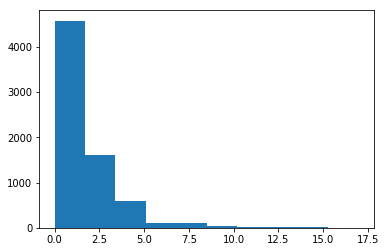

In [65]:
plt.hist(list_streaks);

In [94]:
l_series = pd.Series(list_streaks).value_counts()
l_series

0     2822
1     1753
2     1019
3      595
4      356
5      228
6      114
7       59
8       40
9       24
10      16
11      14
13       9
14       6
12       4
16       2
17       1
15       1
dtype: int64

In [96]:
list_streaks

[3,
 0,
 4,
 1,
 2,
 3,
 4,
 2,
 1,
 4,
 1,
 0,
 1,
 1,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 3,
 1,
 3,
 1,
 3,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 1,
 0,
 4,
 0,
 2,
 1,
 0,
 1,
 2,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 3,
 1,
 0,
 0,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 3,
 1,
 1,
 1,
 2,
 0,
 1,
 0,
 5,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 3,
 3,
 0,
 1,
 2,
 0,
 0,
 0,
 7,
 2,
 1,
 2,
 4,
 3,
 2,
 8,
 1,
 1,
 2,
 1,
 3,
 8,
 0,
 0,
 3,
 0,
 0,
 0,
 13,
 0,
 0,
 1,
 2,
 2,
 1,
 6,
 2,
 0,
 0,
 3,
 3,
 1,
 0,
 0,
 0,
 2,
 1,
 1,
 4,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 4,
 1,
 3,
 1,
 0,
 0,
 6,
 1,
 0,
 0,
 1,
 0,
 1,
 4,
 1,
 6,
 7,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 1,
 2,
 3,
 0,
 3,
 1,
 8,
 3,
 4,
 2,
 0,
 0,
 2,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 3,
 0,
 2,
 5,
 7,
 0,
 0,
 2,
 1,
 0,
 7,
 0,
 1,
 1,
 0,
 2,
 0,
 1,
 0,
 0,
 2,
 0,
 5,
 2,
 5,
 2,
 2,
 0,
 0,
 2,
 1,
 3,
 4,
 2,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 5,
 2,
 1,
 0,
 1,
 0,
 1,